# Ejercicio: Análisis de calificaciones y rendimientos de películas

- Objetivos:
    - Realizar análisis estadísticos y manipulaciones de datos utilizando Numpy.
    - Aplicar técnicas de preparación de datos para trabajar con tipos de datos numéricos y manejar valores faltantes.

## Preparación de datos

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Lectura del dataset

df_IMDB_movie_data = pd.read_csv("IMDB-Movie-Data.csv")
df_IMDB_movie_data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [4]:
# Selección de las columnas relevantes

columnas_relevantes = ['Title', 'Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)']
df_columnas_relevantes = df_IMDB_movie_data[columnas_relevantes]

In [5]:
# Convertir las columnas relevantes a un array de Numpy

numpy_array_columnas_relevantes = df_columnas_relevantes.to_numpy()

In [6]:
# Manejo de los valores faltantes en 'Revenue (Millions)' reemplazándolos con la media de la columna

#Primero se encuentran los índices de valores faltantes en 'Revenue (Millions)'
missings_revenue_indices = np.isnan(numpy_array_columnas_relevantes[:, 5].astype(float))

#Después se calcula la media de dicha columna, excluyendo esos valores faltantes
mean_revenue_sin_missings = np.nanmean(numpy_array_columnas_relevantes[:, 5].astype(float))

#Por último se reemplazan los valores faltantes con la media que se acaba de calcular
numpy_array_columnas_relevantes[missings_revenue_indices, 5] = mean_revenue_sin_missings

## Análisis Estadístico con Numpy

In [7]:
# Calcular la calificación promedio de las películas
calificacion_promedio = np.mean(numpy_array_columnas_relevantes[:, 3])
print(f"La calificación promedio de las películas es de: {calificacion_promedio}")

La calificación promedio de las películas es de: 6.723200000000003


In [24]:
# Encontrar la película con la duración más larga
indice_pelicula_mas_larga = np.argmax(numpy_array_columnas_relevantes[:, 2].astype(float))
pelicula_mas_larga = numpy_array_columnas_relevantes[indice_pelicula_mas_larga, 0]
minutos_pelicula_mas_larga = numpy_array_columnas_relevantes[indice_pelicula_mas_larga, 2]
print(f"La película con más duración es {pelicula_mas_larga} con una duración de {minutos_pelicula_mas_larga} min")

La película con más duración es: Grindhouse con una duración de 191 min


In [9]:
# Calcular el ingreso promedio y la mediana de los ingresos de las películas
ingreso_promedio = np.mean(numpy_array_columnas_relevantes[:, 5].astype(float))
ingreso_mediana = np.median(numpy_array_columnas_relevantes[:, 5].astype(float))
print(f"El ingreso promedio es de: {ingreso_promedio}")
print(f"La mediana del ingreso es de: {ingreso_mediana}")

El ingreso promedio es de: 82.95637614678898
La mediana del ingreso es de: 60.375


## Manipulación de Datos

In [10]:
# Crear un subconjunto de datos con películas lanzadas en los últimos 10 años

#Primero se obtiene el año actual
import datetime
año_actual = datetime.datetime.now().year

#Después se alcula el año mínimo para las películas lanzadas en los últimos 10 años
diez_años_atras = año_actual - 10

# Por último se filtra las películas lanzadas en los últimos 10 años
peliculas_ultimos_10_años = numpy_array_columnas_relevantes[numpy_array_columnas_relevantes[:, 1] >= diez_años_atras]
titulos_peliculas_ultimos_10_años = peliculas_ultimos_10_años[:,0]
print(f"Las películas de los últimos 10 años son: {titulos_peliculas_ultimos_10_años}")

Las películas de los últimos 10 años son: ['Guardians of the Galaxy' 'Split' 'Sing' 'Suicide Squad' 'The Great Wall'
 'La La Land' 'Mindhorn' 'The Lost City of Z' 'Passengers'
 'Fantastic Beasts and Where to Find Them' 'Hidden Figures' 'Rogue One'
 'Moana' 'Colossal' 'The Secret Life of Pets' 'Hacksaw Ridge'
 'Jason Bourne' 'Lion' 'Arrival' 'Gold' 'Manchester by the Sea'
 'Hounds of Love' 'Trolls' 'Independence Day: Resurgence'
 'Paris pieds nus' 'Bahubali: The Beginning' 'Dead Awake' 'Bad Moms'
 "Assassin's Creed" 'Why Him?' 'Nocturnal Animals' 'X-Men: Apocalypse'
 'Deadpool' 'Resident Evil: The Final Chapter'
 'Captain America: Civil War' 'Interstellar' 'Doctor Strange'
 'The Magnificent Seven' 'Sausage Party' 'Moonlight'
 "Don't Fuck in the Woods" 'The Founder' 'Lowriders' 'Miss Sloane'
 'Fallen' 'Star Trek Beyond' 'The Last Face'
 'Star Wars: Episode VII - The Force Awakens' 'Underworld: Blood Wars'
 "Mother's Day" 'John Wick' 'Silence' "Don't Breathe" 'Me Before You'
 'Their Fines

In [12]:
# Calcular el promedio de votos para este subconjunto.

peliculas_ultimos_10_años_calificacion_promedio = np.mean(peliculas_ultimos_10_años[:, 3])
print(f"La calificación promedio de las películas de los últimos 10 años es de: {peliculas_ultimos_10_años_calificacion_promedio}")

La calificación promedio de las películas de los últimos 10 años es de: 6.552298850574712


## Correlación

In [18]:
# Evaluar si hay una correlación entre la calificación de IMDb y los ingresos de las películas. Represéntalo con matplotlib.pyplot

#cálculo de la correlación
correlacion = np.corrcoef(numpy_array_columnas_relevantes[:, 3].astype(float),numpy_array_columnas_relevantes[:, 5].astype(float))[0, 1]
correlacion

0.18952736366192613

Es una correlación moderada. A medida que aumenta la calificación IMDb, aumentan ligeramente los ingresos de las películas

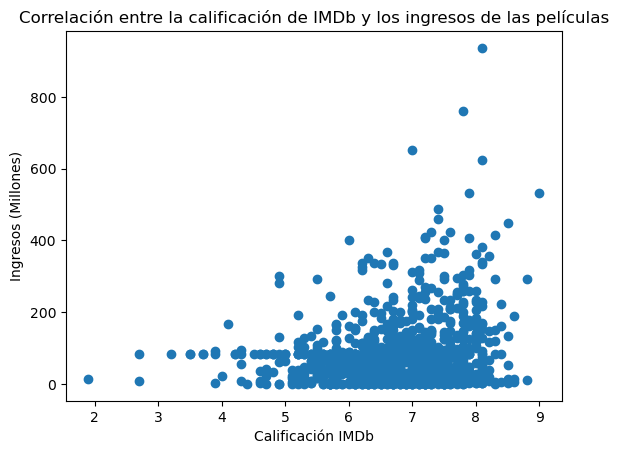

In [17]:
#representación
#import matplotlib as plt
import matplotlib.pyplot as plt

plt.scatter(numpy_array_columnas_relevantes[:, 3].astype(float),numpy_array_columnas_relevantes[:, 5].astype(float))
plt.title('Correlación entre la calificación de IMDb y los ingresos de las películas')
plt.xlabel('Calificación IMDb')
plt.ylabel('Ingresos (Millones)')
plt.show()